## 作业1：跳伞运动员仿真
   一名高空跳伞运动员从飞机上跳下，能够确定海拔高度和运动员自由下落的速度吗？在上一个实例中，炮弹总是保持$500m/s$的水平初速度（知道落入海中）。实际情况下，空气的摩擦阻力将使炮弹减速。同样，作用在运动员身上的重力同样受到空气摩擦力的影响，并随着运动员速度的增加而变大。最终，这一阻力将导致向上的摩擦力与向下的重力平衡，使合外力为零。在这一点，运动员将不再加速并保持稳态速度。
    根据基本空气动力学理论，运动员所受阻力由下式表示：
$$drag={1\over2}\rho v^2SC_d$$
式中，$\rho$为空气密度，$v$为速度，$S$为表面积，$C_d$为阻力系数。
    该公式的计算显然比较复杂。首先，空气密度$\rho$随着海拔高度而变化；第二，总阻力随着速度的平方变化；第三，运动员的表面积随着其运动而变化；最后，阻力系数取决于运动员伞具采用材料的摩擦力系数。这四个变量都是非线性的，因此很难推导出这个公式的显式解。
    为简化这个问题，假设$\rho=1.225kg/m^3$，$S=1.0m^2$，$C_d=0.05$，因此仅有$v$为非线性项。使用Euler法模拟整个运动过程，而不是直接求解公式。
    改变伞打开的时间，观察跳伞运动员的运动状态变化。

In [60]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

假设飞机高度为3000m，跳下后5s打开降落伞，开伞前为自由落体运动

In [64]:
m = UNITS.meter
s = UNITS.second
kg = UNITS.kilogram
g = 9.81 * m/s**2
t_e = 5 * s
dt = 0.01 * s

init_y=State(y=3000 * m,v=0 * m/s)

system_y = System(init=init_y, g=g, t_end=t_e, dt=dt)

def slope_func_y(state, t, system):
    y, v = state
    
    dydt = -v
    dvdt = system.g
    
    return dydt, dvdt
def run_euler(system, slope_func, **options):
    msg = "The solver successfully reached the end of the integration interval."

    init, t_0, t_end, dt = check_system(system, slope_func)
    frame = TimeFrame(columns=init.index)
    frame.row[t_0] = init
    ts = linrange(t_0, t_end, dt) * get_units(t_end)
    # run the solver
    for t1 in ts:
        y1 = frame.row[t1]
        slopes = slope_func(y1, t1, system)
        y2 = [y + slope * dt for y, slope in zip(y1, slopes)]
        a = y2[0]
        if a<0 :
            break
        else:
            t2 = t1 + dt
            frame.row[t2] = y2

    details = ModSimSeries(dict(message="Success"))
    return frame, details
results_y, details_y = run_euler(system_y, slope_func_y)

y0 = get_last_value(results_y.y)
v0 = get_last_value(results_y.v)


49.050000000000225 <Unit('meter / second')>

开伞后，假设$\rho=1.225kg/m^3$，$S=1.0m^2$，$C_d=0.05$，运动员质量$M=85kg$

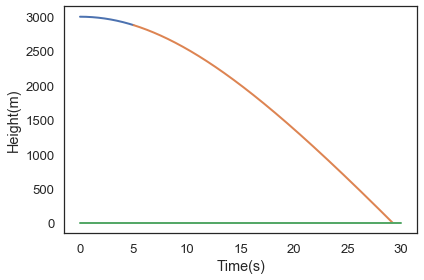

In [65]:
init_z=State(y=y0,v=v0)

M = 85 * kg
rho = 1.225 * kg/m**3
S = 1.0 * m**2
C = 0.05
t_end = 30 * s

system_z = System(init=init_z, g=g,t_0= t_e, t_end=t_end, dt=dt)

def slope_func_z(state, t, system):
    y, v = state
    
    dydt = -v
    dvdt = system.g - 0.5 * rho * S * C * v**2/M
    
    return dydt, dvdt

results_z, details_z = run_euler(system_z, slope_func_z)

plot(results_y.y)
plot(results_z.y)
decorate(xlabel='Time(s)',
         ylabel='Height(m)')
x=[0,5,10,15,20,25,30]
y=[0,0,0,0,0,0,0]
plot(x,y)

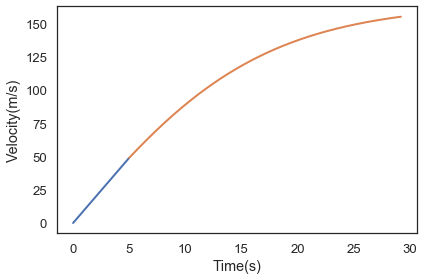

In [63]:
plot(results_y.v)
plot(results_z.v)
decorate(xlabel='Time(s)',
         ylabel='Velocity(m/s)')